Prueba Regresion Lineal

**Dataset =** ArchivoEstadisticaConciliacion.xlsx (Solicitudes de Conciliación)

A partir de la entrada en vigencia de la Ley 640 en el año 2001, la Dirección de Métodos Alternativos de Solución de Conflictos -DMASC- del Ministerio de Justicia y del Derecho, inició la conformación de un registro con los datos disponibles de centros conciliación y arbitraje, el cual fue alimentando hasta 2006 con la información remitida por centros y entidades mediante el diligenciamiento de tablas en Excel.

Posteriormente en el año 2007, se implementó el Sistema de Información de la Conciliación SIC, el cual optimizó el registro de Casos de Conciliación y funcionó hasta el año 2015.

Las estadísticas presentadas, han sido generadas a partir de los datos reportados al Ministerio de Justicia y del Derecho hasta cuando lo señala la fecha de actualización correspondiente. En la actualidad y con ocasión de la entrada en operación del Sistema de Información de la Conciliación, el Arbitraje y la Amigable Composición -SICAAC-, se esta llevando a cabo un proceso de vinculación de la totalidad de los operadores que se tiene previsto concluir en el año 2020.

**fuente:** Sistema de Información de la Conciliación, el Arbitraje y la Amigable Composición – SICAAC del Ministerio de Justicia y del Derecho de Colombia

Cargue de librerias

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, model_selection

In [64]:
data = pd.read_excel('IA Boocamp Python\ArchivoEstadisticaConciliacion.xlsx')
data

,SicIdEstadisticaConciliacion,SicAño,SicDepartamento,SicCodigoDANE,SicCiudad,SicArea,SicNombreAsunto,SicNombreClasificacionAsunto,SicTipoFuncionario,SicTipoDocumento,...,SicAcuerdoExtraconciliacion,SicConstanciaNoAcuerdo,SicConstanciaAsuntoNoConciliable,SicConstanciaInasistencia,SicFaltaCompetencia,SicFaltaPagoServicio,SicDesistimientodeUnaoAmbasPartes,SicOtros,SicRetiroSolicitud,SicSinTerminar
0,961233,2002,SIN DEFINIR,0,SIN DEFINIR,CIVIL Y COMERCIAL,TEMAS NO DEFINIDOS,SIN DEFINIR,SIN DEFINIR,SIN TIPO DOCUMENTO,...,0,3664,318,7343,0,0,0,659,0,0
1,961234,2002,SIN DEFINIR,0,SIN DEFINIR,CONTENCIOSO ADMINISTRATIVO,TEMAS NO DEFINIDOS,SIN DEFINIR,SIN DEFINIR,SIN TIPO DOCUMENTO,...,0,25,5,11,0,0,0,8,0,0
2,961235,2002,SIN DEFINIR,0,SIN DEFINIR,FAMILIA,TEMAS NO DEFINIDOS,SIN DEFINIR,SIN DEFINIR,SIN TIPO DOCUMENTO,...,0,1740,90,3410,0,0,0,377,0,0
3,961236,2002,SIN DEFINIR,0,SIN DEFINIR,LABORAL,TEMAS NO DEFINIDOS,SIN DEFINIR,SIN DEFINIR,SIN TIPO DOCUMENTO,...,0,213,47,547,0,0,0,8,0,0
4,961237,2002,SIN DEFINIR,0,SIN DEFINIR,PENAL,TEMAS NO DEFINIDOS,SIN DEFINIR,SIN DEFINIR,SIN TIPO DOCUMENTO,...,0,145,6,180,0,0,0,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77176,1072932,2023,VALLE DEL CAUCA,76869,VIJES,FAMILIA,OBLIGACIONES FRENTE A LOS HIJOS E INCAPACES,CUSTODIA Y RÉGIMEN SOBRE MENORES E INCAPACES,ALCALDÍA,SIN TIPO DOCUMENTO,...,0,0,0,0,0,0,0,1,0,0
77177,1072933,2023,VALLE DEL CAUCA,76869,VIJES,FAMILIA,OTROS,SIN SUBTEMA,ALCALDÍA,SIN TIPO DOCUMENTO,...,0,0,0,0,0,0,0,1,0,0
77178,1072934,2023,VALLE DEL CAUCA,76869,VIJES,FAMILIARES,OTROS,SIN SUBTEMA,ALCALDÍA,SIN TIPO DOCUMENTO,...,0,0,0,0,0,0,0,0,0,0
77179,1072935,2023,VALLE DEL CAUCA,76892,YUMBO,ACUERDOS DE APOYO,PERSONAS EN ESTADO DE DISCAPAC,SIN SUBTEMA,SUPERINTENDENCIA DE NOTARIADO Y REGISTRO,SIN TIPO DOCUMENTO,...,0,0,0,0,0,0,0,8,0,1


In [65]:
data.shape

(77181, 24)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77181 entries, 0 to 77180
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   SicIdEstadisticaConciliacion       77181 non-null  int64 
 1   SicAño                             77181 non-null  int64 
 2   SicDepartamento                    77181 non-null  object
 3   SicCodigoDANE                      77181 non-null  int64 
 4   SicCiudad                          77181 non-null  object
 5   SicArea                            77181 non-null  object
 6   SicNombreAsunto                    77181 non-null  object
 7   SicNombreClasificacionAsunto       77181 non-null  object
 8   SicTipoFuncionario                 77181 non-null  object
 9   SicTipoDocumento                   77181 non-null  object
 10  SicTipoEntidad                     77181 non-null  object
 11  SicSolicitudesConciliacion         77181 non-null  int64 
 12  SicA

In [67]:
data.isna().sum()

SicIdEstadisticaConciliacion         0
SicAño                               0
SicDepartamento                      0
SicCodigoDANE                        0
SicCiudad                            0
SicArea                              0
SicNombreAsunto                      0
SicNombreClasificacionAsunto         0
SicTipoFuncionario                   0
SicTipoDocumento                     0
SicTipoEntidad                       0
SicSolicitudesConciliacion           0
SicActaConciliacionTotal             0
SicActaConciliacionParcial           0
SicAcuerdoExtraconciliacion          0
SicConstanciaNoAcuerdo               0
SicConstanciaAsuntoNoConciliable     0
SicConstanciaInasistencia            0
SicFaltaCompetencia                  0
SicFaltaPagoServicio                 0
SicDesistimientodeUnaoAmbasPartes    0
SicOtros                             0
SicRetiroSolicitud                   0
SicSinTerminar                       0
dtype: int64

In [68]:
dataR = data.groupby(['SicAño','SicCodigoDANE'])[['SicSolicitudesConciliacion',
                                                                'SicActaConciliacionTotal',
                                                                'SicActaConciliacionParcial',
                                                                'SicAcuerdoExtraconciliacion',
                                                                'SicConstanciaNoAcuerdo',
                                                                'SicConstanciaAsuntoNoConciliable']].sum()

In [69]:
dataR

SicSolicitudesConciliacion  SicActaConciliacionTotal  \
SicAño SicCodigoDANE                                                         
2002   0                                   32563                     12809   
2003   0                                   70044                     24165   
2004   0                                   79453                     28099   
2005   0                                   65386                     20439   
2006   0                                   66765                     21995   
...                                          ...                       ...   
2023   86885                                 177                       176   
       88001                                  17                         8   
       91001                                  18                        13   
       94001                                  21                        12   
       95001                                  69                        57   

                      SicActaConciliacionParcial  SicAcuerdoExtraconciliacion  \
SicAño SicCodigoDANE                                                            
2002   0                                     533                            0   
2003   0                                    2975                            0   
2004   0                                    3393                            0   
2005   0                                    2877                            0   
2006   0                                    2749                            0   
...                                          ...                          ...   
2023   86885                                   1                            0   
       88001                                   0                            0   
       91001                                   0                            1   
       94001                                   0                            0   
       95001                                   1                            0   

                      SicConstanciaNoAcuerdo  SicConstanciaAsuntoNoConciliable  
SicAño SicCodigoDANE                                                            
2002   0                                6017                               500  
2003   0                               14667                               294  
2004   0                               17732                               319  
2005   0                               13052                              4634  
2006   0                               14386                               162  
...                                      ...                               ...  
2023   86885                               0                                 0  
       88001                               4                                 0  
       91001                               2                                 0  
       94001                               1                                 0  
       95001                               0                                 0  

[4841 rows x 6 columns]

In [70]:
dataRegresion = data[['SicActaConciliacionParcial', 'SicActaConciliacionTotal']]
dataRegresion

,SicActaConciliacionParcial,SicActaConciliacionTotal
0,404,7704
1,0,56
2,115,4168
3,9,394
4,4,413
...,...,...
77176,7,7
77177,1,1
77178,31,1
77179,0,0


In [71]:
dataRegresion['XY'] = data['SicActaConciliacionParcial']*data['SicActaConciliacionTotal']
dataRegresion['X2'] = data['SicActaConciliacionParcial']**2
dataRegresion['Y2'] = data['SicActaConciliacionTotal']**2
dataRegresion

C:\Users\ricar\AppData\Local\Temp\ipykernel_20828\551422102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRegresion['XY'] = data['SicActaConciliacionParcial']*data['SicActaConciliacionTotal']
C:\Users\ricar\AppData\Local\Temp\ipykernel_20828\551422102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRegresion['X2'] = data['SicActaConciliacionParcial']**2
C:\Users\ricar\AppData\Local\Temp\ipykernel_20828\551422102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,SicActaConciliacionParcial,SicActaConciliacionTotal,XY,X2,Y2
0,404,7704,3112416,163216,59351616
1,0,56,0,0,3136
2,115,4168,479320,13225,17372224
3,9,394,3546,81,155236
4,4,413,1652,16,170569
...,...,...,...,...,...
77176,7,7,49,49,49
77177,1,1,1,1,1
77178,31,1,31,961,1
77179,0,0,0,0,0


In [72]:
sumX  = dataRegresion['SicActaConciliacionParcial'].sum()
sumY  = dataRegresion['SicActaConciliacionTotal'].sum()
sumXY = dataRegresion['XY'].sum() 
sumX2 = dataRegresion['X2'].sum()
sumY2 = dataRegresion['Y2'].sum()

print(" Conciliaciones Parciales:",sumX,"\n Conciliaciones Totales :",sumY,"\n XY:",sumXY,"\n X2:",sumX2,"\n Y2:",sumY2)

 Conciliaciones Parciales: 64866 
 Conciliaciones Totales : 914755 
 XY: 236985539 
 X2: 56927390 
 Y2: 1884252523


Pendiente

In [73]:
n = int(len(dataRegresion))
m = (n*sumXY-sumX*sumY)/(n*sumX2-sumX**2)
m = float(m)
print('Pendiente:',m)

Pendiente: 4.15341665740404


Punto de Corte

In [74]:
b = (sumY/n)- m*(sumX/n)
b = float(b)
print('Punto de Corte:',b)

Punto de Corte: 8.361377477628297


Punto Final

In [75]:
Xf = dataRegresion['SicActaConciliacionParcial'].tail(1).values[0]
Yf = m*(Xf)+b
Yf

8.361377477628297

Datos Finales

In [76]:
X_final = [0,Xf]
Y_final = [b,Yf]


dfPuntos = {'Punto X final':X_final,
               'Punto X final':Y_final}

dfP = pd.DataFrame(dfPuntos)
dfP

,Punto X final
0,8.361377
1,8.361377


Grafica

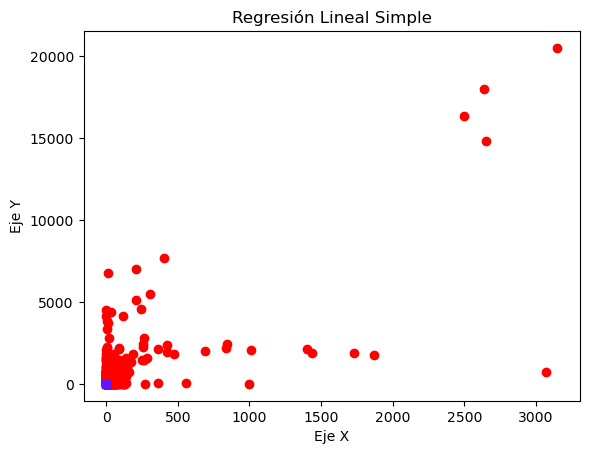

In [77]:
X = data['SicActaConciliacionParcial']
Y = data['SicActaConciliacionTotal']
fig, ax = plt.subplots()
plt.scatter(X,Y, color='red')
ax.plot(X_final,Y_final,marker='s', linestyle='-', color='#6416f5')
plt.title('Regresión Lineal Simple')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

Suma de cuadrado de residuo: Comprensión de Lista

In [83]:
sumaCuadadoResudio =sum([(Y[i] - (m * X[i] + b)) ** 2 for i in range(n)])
print("Suma Cuadraro Residuo:", sumaCuadadoResudio)

Suma Cuadraro Residuo: 892304225.8974106


Suma cuadrados de residuos: Ciclo For

In [85]:
sumaCuadadoResudio=0
for i in range(n):
    sumaResiduo =(Y[i]-(m*X[i]+b))**2
    sumaCuadadoResudio += sumaResiduo
print("Suma Cuadrado Residuo:",sumaCuadadoResudio)

Suma Cuadrado Residuo: 892304225.8974106


In [86]:
PromediosumaCuadadoResudio=sumaCuadadoResudio/n
print("Promedio Suma Cuadrado Residuo:",PromediosumaCuadadoResudio)

Promedio Suma Cuadrado Residuo: 11561.190265705427


In [88]:
rmse=PromediosumaCuadadoResudio**(1/2)
rmse_n=rmse/n
print("rmse:",rmse_n)

rmse: 0.0013931275252302238
